
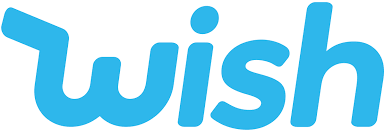

## Problem Definition
The dataset is the wish.com product dataset. We collected the data combined  with some available data. 
Some nosies are added to the dataset. The goal is to predict the product ratings given the other features known
for a product on Wish.com. Ratings are in categories from 1 to 5.
For one product, the higher the rating is, the more the customers like the product.
In this way, when you have a new product to be put on wish.com, you can estimate how likely people will like your product,
without actually listing out there. Also, by doing this, it helps us to understand under what certain conditions that a product
will be highly rated, as a way to understand the customer base of the wish.com.

## What is the input?
Our input is a tabular dataset showing the ratings of certain products given other features known for a product on Wish.com
The input consists of 33 features that represent each product such as the merchant name, merchant id , color of the products and its sizes ..etc .



##  What is the output?
The output are the ratings are in categories from 1 to 5

## What data mining function is required?
Data Mining Functions
1. Generalization, Characterization and Summarization
2. Association and Correlation
3. Classification & Prediction
4. Clustering
5. Outlier/Anomaly Analysis
6. Time and Ordering 
7. Structure and Network Analysis
8. Knowledge Evaluation

The data mining in this problem requires Classification & Prediction After making Outlier/Anomaly Analysis and cleaning the data

##   What could be the challenges?
The Challenges represented in:
Missing data
Repeated data
Columns (or Features) that contain incompateble data type or data scale
Columns (or Features) that contain text with different language
There were so many colours
There were so many sizes

## What is the impact? 
The impact of using the raw data as it is, without cleaning and reprocessing, will result a model with low accuracy that doesn't learn well or a desired from the data in the traing stage

the real-life impact of building a model that solve this problem is represent in making the e-commerce site (wish) predict the rating of product before the user rate it using the built model and this will lead to present the appropraite products for each user which will result the rais of customers satisfication in addition to increase the compainy profit

##  What is an ideal solution?
the ideal solution is to clean and preprocess the data before working with it

Some of the possible solutions are:

Filling the missing data with approprait value
Try to edit the values of Columns (or Features) that contain incompateble data type or data scale in order to make it have the sapme datatype or range
Replace the values of Columns (or Features) that contain text with different language with translated text


## highlights
Customer personalization makes us understand who will buy our products, what kind of products and how we tell them about our products. In this dataset, we know that customers are looking products coloured in black, white, gray etc and looking for S, M, XS, etc product size.
Because customers are price sensitive, merchants are suggested to analyze their pricing strategy by considering costs, market segmentation, competitors, product quality before competing in the market.

## What is the experimental protocol used and how was it carried out?
after loding the data and cleaning and preprocessing it, then encodig it using one hot encoding, the experimental protocol used is spliting the training dataset into train and test to fit the model using the new train data and measure the perormance (f1_score) of the model using the new test data and then make the prediction by using the original test dataset

## What preprocessing steps are used?
view the data and understand it
using train.info() to get mor insight about the data
check the missing data using train.isna().sum()
removing featuers that contain same value for all the data point as it won't affect the learning of the model or the prediction resuls
analysis each feature independently in order to:
add appropraite value for missing data
replace noise data with suitable value
translate text values that writen in different language

In [1]:
#importing the required libraries 📚
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading 

In [2]:
#Reading the training dataset🤓
train = pd.read_csv('train_new.csv') 
train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [3]:
#Reading the testing dataset🤓
test = pd.read_csv('test_new.csv') 
test.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [4]:
# returns the shape of an array
train.shape

(1094, 34)

In [5]:
#returns the shape of an array
test.shape

(479, 33)

## Data visualization

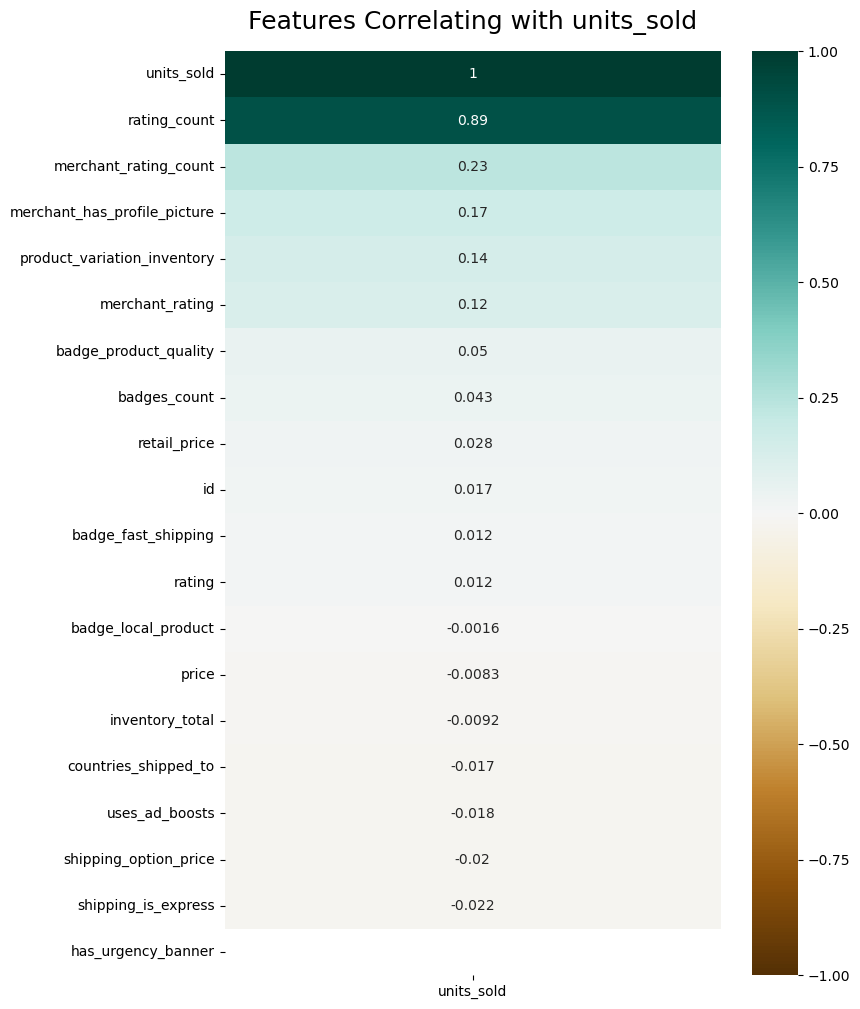

In [6]:
#Features Correlating with units_sold 🤓
target_col = 'units_sold'
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[[target_col]].sort_values(by=target_col, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Features Correlating with {target_col}', fontdict={'fontsize':18}, pad=16);

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [8]:
#remove duplicates 👻
train = train.drop_duplicates()
test = test.drop_duplicates()
train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [9]:
#checking null values😱
nullcount = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
misData = pd.concat([nullcount[nullcount > 0], percent[percent > 0]], axis=1, keys=['Total','Percent'])
misData[misData['Percent'] > 0]

,Total,Percent
merchant_profile_picture,924,0.844607
has_urgency_banner,745,0.680987
urgency_text,745,0.680987
product_color,29,0.026508
origin_country,12,0.010969
product_variation_size_id,12,0.010969
merchant_name,4,0.003656


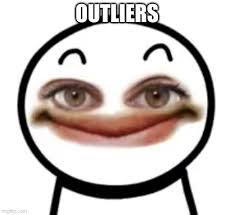

### From our observation 🤓
  we will find out that columns product_color, product_variation_size_id, has_urgency_banner, urgency_text, origin_country and merchant_profile_picture have many missing values that should be preprocessed
 
We have two feature that contain a lot of unique value ( product_variation_size_id and product_color). The data is narrowed down in several "Size" and "Color" which have a large proportion in the dataset. 

In [10]:
#There are so many colours, let's see if we can combine different shades of a colour into one colour like :
#example navy blue, blue and light blue into just blue 🌈
train['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [11]:
#There are so many colours, let's see if we can combine different shades of a colour into one colour like :
#example navy blue, blue and light blue into just blue🌈
train[train['product_color'].str.contains('&', na=False)]['product_color'].unique()

array(['white & green', 'pink & black', 'pink & white', 'black & yellow',
       'navyblue & white', 'black & blue', 'black & green',
       'white & black', 'black & white', 'pink & blue', 'brown & yellow',
       'blue & pink', 'winered & yellow', 'pink & grey'], dtype=object)

In [12]:
train['product_color'] = train['product_color'].str.lower()
test['product_color'] = test['product_color'].str.lower()
# remove trailing white spaces
train['product_color'] = train['product_color'].str.strip()
test['product_color'] = test['product_color'].str.strip()

In [13]:
#preprocessing the product_color 🌈
colour_synonym = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}

def update_color(col):
    if colour_synonym.get(col, False):
        return colour_synonym.get(col)
    elif '&' in col:
        return 'dual'
    elif col in colour_synonym.values():
        return col
    else:
        return 'other'

train['product_color'].replace(np.nan, 'others', inplace=True)
test['product_color'].replace(np.nan, 'others', inplace=True)

train['product_color'] = train.product_color.apply(update_color)
test['product_color'] = test.product_color.apply(update_color)

In [14]:
#problem solved ✌️
train['product_color'].value_counts()

black     224
white     179
blue      122
green     106
red        96
pink       76
yellow     70
other      68
grey       57
purple     37
dual       30
orange     17
brown      12
Name: product_color, dtype: int64

In [15]:
col_df = train.groupby('product_color').agg('sum')['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)
col_df

,product_color,units_sold
0,black,1335500
1,blue,458358
2,brown,11750
3,dual,101450
4,green,426422
5,grey,388720
6,orange,120608
7,other,397922
8,pink,206600
9,purple,235920


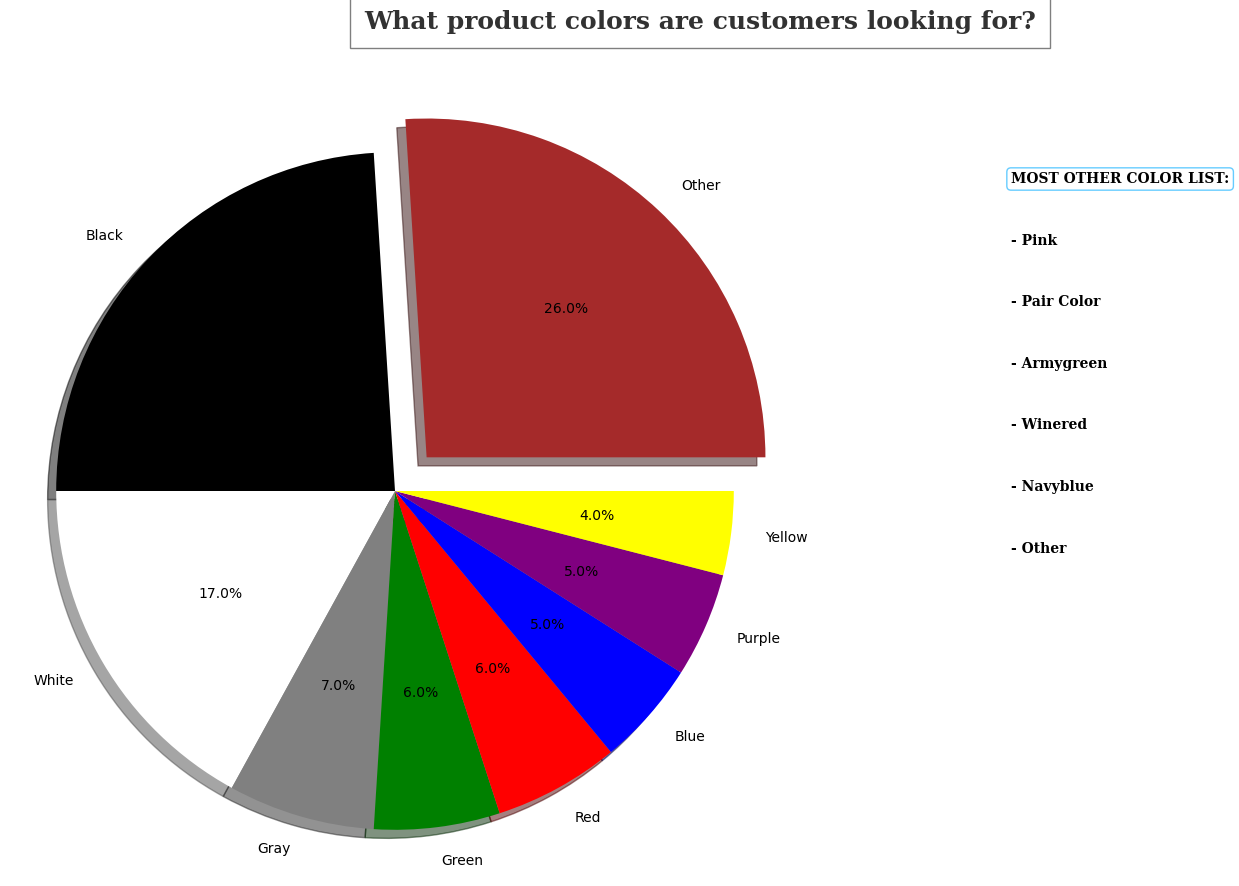

In [16]:
#Plotting and obsereve that After applying the necesssary transformation of the colour column 
#we can see that black has sold most units followed by white.🌈
other_col = ['Pink', 'Pair Color', 'Armygreen', 'Winered', 'Navyblue', 'Other']
size_other_col = [99, 38, 30, 27, 27, 181]

prod_col = train.groupby(['units_sold', 'product_color']).count().loc[:, 'retail_price'].reset_index()
prod_col['color_sold'] = prod_col['units_sold'] * prod_col['retail_price']
data_col = prod_col.groupby('product_color')['color_sold'].sum().sort_values(ascending = False).reset_index()
data_col['percent'] = round(data_col['color_sold'] / data_col['color_sold'].sum(), 2)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

label = ['Other', 'Black', 'White', 'Gray', 'Green', 'Red', 'Blue', 'Purple', 'Yellow']
size_color = [0.26, 0.24, 0.17, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04]
explode = [0.15, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(size_color, labels = label, explode = explode, autopct = '%1.1f%%', 
             counterclock = True, shadow = True, radius = 1.1, 
             colors = [ 'brown', 'black', 'white', 'gray', 'green', 'red', 'blue', 'purple', 'yellow', 'white'])

ax.text(2, 1, 'MOST OTHER COLOR LIST:', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox=dict(boxstyle="round", fc="white", color = '#66ccff'))

ax.text(-0.1, 1.5, 'What product colors are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

y_pos = [0.8, 0.6, 0.4, 0.2, 0, -0.2]
for i, y in zip(other_col, y_pos):
    ax.text(2, y, f'- {i}', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox = dict(boxstyle = "round", color = 'white'))
    
plt.show()

In [17]:
!pip install joypy

In [18]:
train['tags_count'] = [len(str(x).split(",")) for x in train['tags']]
test['tags_count'] = [len(str(x).split(",")) for x in test['tags']]
train['tags_count']

0       16
1       22
2       23
3       16
4       20
        ..
1089    13
1090    18
1091    16
1092    20
1093    14
Name: tags_count, Length: 1094, dtype: int64

<Figure size 640x480 with 0 Axes>

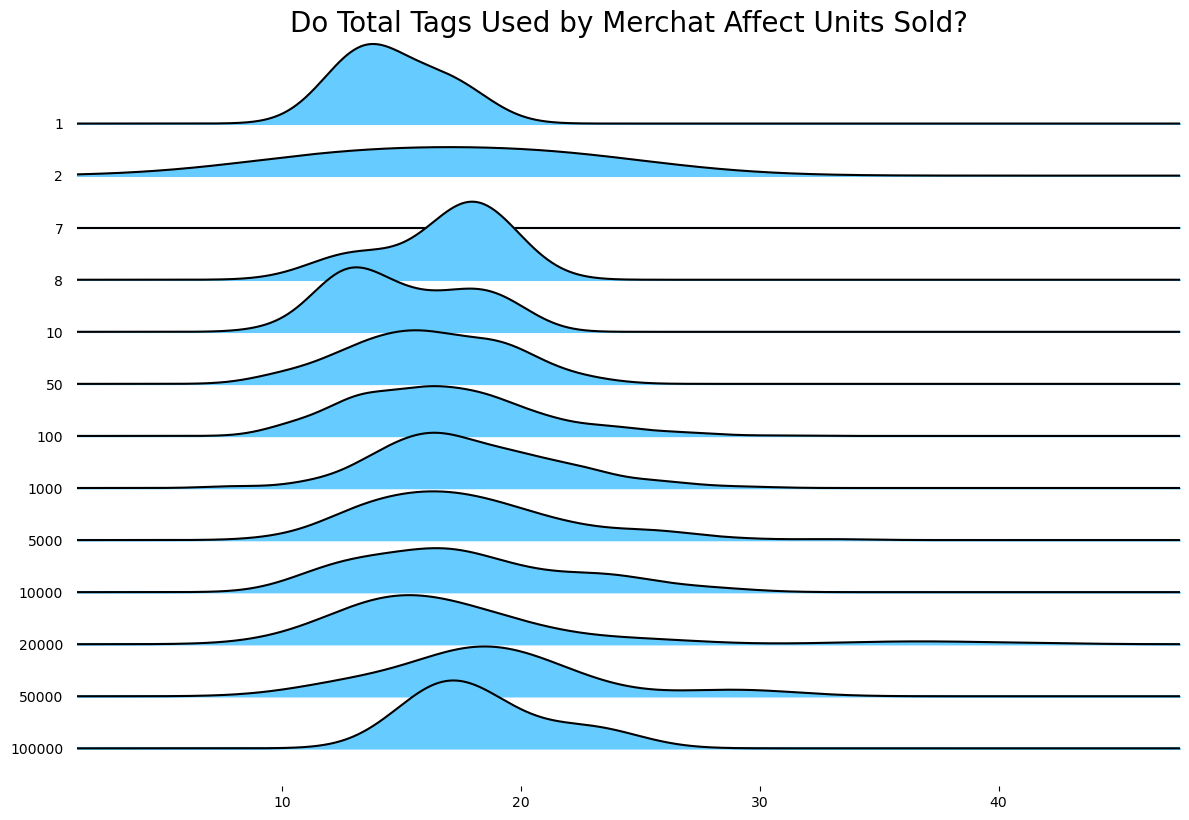

In [19]:
#Total tags by product display that merchant used do not appear to have a significant effect on units sold.👀
#This shows that most customers find their products through product title searches instead of searching through tags.👀
from joypy import joyplot
from matplotlib import pyplot as plt

plt.figure()

joyplot(
    data=train[['units_sold', 'tags_count']], 
    by='units_sold',
    color = '#66ccff',
    figsize=(12, 8)
)
plt.title('Do Total Tags Used by Merchat Affect Units Sold?', fontsize=20)
plt.show()

In [20]:
# preprocessing origin_country
country_cnt = train['origin_country'].value_counts()
country_cnt

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [21]:
# We will replace this with CN as its the most frequent value.👌
train['origin_country'].fillna('CN', inplace=True)
test['origin_country'].fillna('CN', inplace=True)

In [22]:
Urgency = train.loc[:,'has_urgency_banner']
Urgency

0       NaN
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1089    NaN
1090    NaN
1091    NaN
1092    1.0
1093    1.0
Name: has_urgency_banner, Length: 1094, dtype: float64

In [23]:
#Filling the Nan values with zero which express that there was no urgency or troubles with this transaction👌
train.loc[:, 'has_urgency_banner']=Urgency.fillna(0)
test.loc[:, 'has_urgency_banner']=Urgency.fillna(0)

In [24]:
#Checking urgent text 
train['urgency_text'].value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [25]:
# replace multiple values in a column in pandas dataframe
train['urgency_text'] = train['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Discount on bulk purchases', 
    np.nan: 'None'
})

train['urgency_text'].value_counts()

None                          745
Limited Quantity              348
Discount on bulk purchases      1
Name: urgency_text, dtype: int64

In [26]:
# replace multiple values in a column in pandas dataframe

test['urgency_text'] = test['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Discount on bulk purchases', 
    np.nan: 'None'
})

test['urgency_text'].value_counts()

None                355
Limited Quantity    124
Name: urgency_text, dtype: int64

In [27]:
# Analysis the units_sold feature 
train['units_sold'].value_counts()
# As the units sold less than 10 has a low count we can change them to 10 to minimize the number of categories
# and as they have a very smal count they won't affect the count of the category 10 and even they won't
# affect the order of data 

train.loc[train['units_sold'] < 10, 'units_sold'] = 10

In [28]:
# Analysis the units_sold feature 
test['units_sold'].value_counts()
# As the units sold less than 10 has a low count we can change them to 10 to minimize the number of categories
# and as they have a very smal count they won't affect the count of the category 10 and even they won't
# affect the order of data 

test.loc[train['units_sold'] < 10, 'units_sold'] = 10

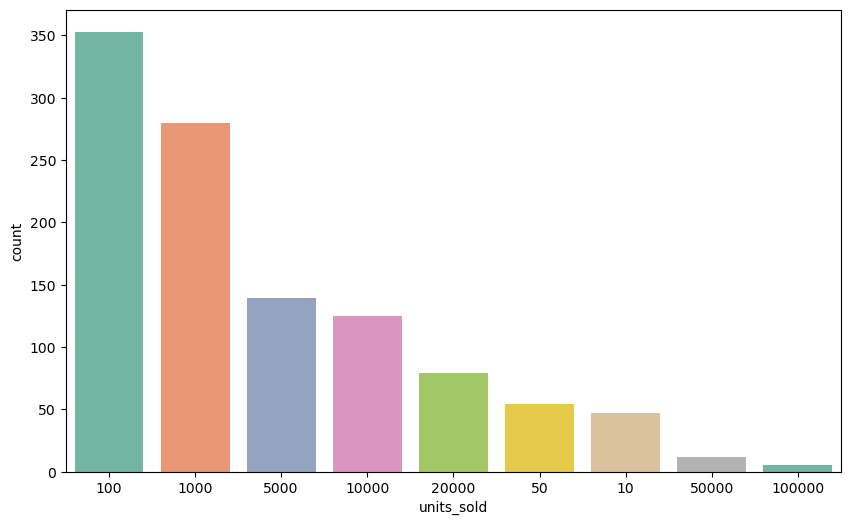

In [29]:
# plot a figure for units_sold data counting after cleaning it

plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'units_sold',
                   palette= "Set2",
                   order = train['units_sold'].value_counts().index,
                   data=train)

plt.show()

In [30]:
# Analysis the merchant_name feature 
train['merchant_name'] = train['merchant_name'].replace(np.nan, 'Unknown')

In [31]:
test['merchant_name'] = test['merchant_name'].replace(np.nan, 'Unknown')

In [32]:
# count the product_variation_size_id
train["product_variation_size_id"].value_counts()


S           444
XS          248
M           135
XXS          76
L            29
           ... 
pants-S       1
XXXXL         1
SIZE-XXS      1
1pc           1
H01           1
Name: product_variation_size_id, Length: 83, dtype: int64

In [33]:
# Analysis the product_variation_size_id 🙌
size_list = list(train['product_variation_size_id'])

xxs_err = []
xs_err = []
s_err = []
m_err = []
l_err = []
xl_err = []
xxl_err = []

for i in size_list:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS'):
        xxs_err.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_err.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_err.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_err.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_err.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_err.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
    or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_err.append(i)
        
def size(tipe):
    if tipe in xxs_err:
        return 'XXS'
    elif tipe in xs_err:
        return 'XS'
    elif tipe in s_err:
        return 'S'
    elif tipe in m_err:
        return 'M'
    elif tipe in l_err:
        return 'L'
    elif tipe in xl_err:
        return 'XL'
    elif tipe in xxl_err:
        return 'XXL'
    else:
        return 'OTHER'
train['product_variation_size_id'] = train['product_variation_size_id'].apply(size)  
test['product_variation_size_id'] = test['product_variation_size_id'].apply(size)  
pd.DataFrame(train['product_variation_size_id'].value_counts())

,product_variation_size_id
S,460
XS,254
M,139
OTHER,91
XXS,83
L,29
XXL,25
XL,13


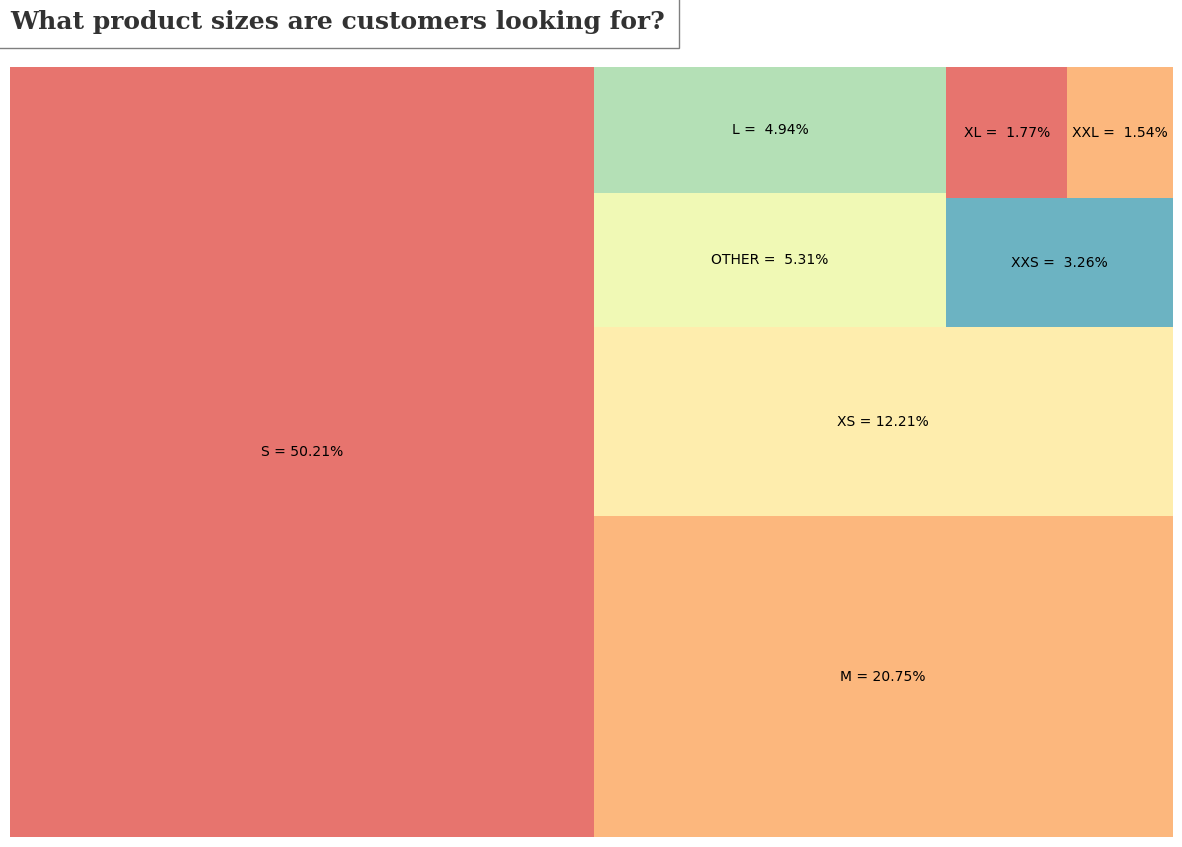

In [34]:
#visualize the product_variation_size_id 👀 
!pip install squarify
import squarify
import seaborn as sb
size_map = train.groupby(['units_sold', 'product_variation_size_id']).count().loc[:, 'retail_price'].reset_index()
size_map['size_sold'] = size_map['units_sold'] * size_map['retail_price']
data_size = size_map.groupby('product_variation_size_id')['size_sold'].sum().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

perc = [str('{:5.2f}'.format(i / data_size['size_sold'].sum() * 100)) + "%" for i in data_size['size_sold']]
lbl = [el[0] + " = " + el[1] for el in zip(data_size['product_variation_size_id'], perc)]

squarify.plot(sizes = data_size['size_sold'],color=sb.color_palette("Spectral"), label = lbl, alpha = 0.8, ax = ax)

ax.text(0, 105, 'What product sizes are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
plt.axis('off')
plt.show()


In [35]:
train['merchant_info_subtitle'].value_counts()

86 % avis positifs (12,309 notes)    8
83 % avis positifs (32,168 notes)    7
85 % avis positifs (80,093 notes)    5
84 % avis positifs (1,047 notes)     5
85 % avis positifs (5,264 notes)     5
                                    ..
90 % avis positifs (2,359 notes)     1
90 % avis positifs (26,833 notes)    1
86 % avis positifs (4,335 notes)     1
79 % avis positifs (667 notes)       1
78 % avis positifs (6,632 notes)     1
Name: merchant_info_subtitle, Length: 808, dtype: int64

In [36]:
train['merchant_title'].value_counts()

Suyi Technology                             8
guangzhouweishiweifushiyouxiangongsi        7
shuilingjiao international trade company    6
sjhdstoer                                   6
Sangboo Store                               6
                                           ..
Wwenliping                                  1
yourvogue                                   1
caohongbo                                   1
bumanke003                                  1
OIUG 56465                                  1
Name: merchant_title, Length: 747, dtype: int64

In [37]:
#dropping the unnecessary features 👎
train.drop('tags',axis='columns', inplace=True)
train.drop('shipping_option_name',axis='columns', inplace=True)
train.drop('merchant_title',axis='columns', inplace=True)
train.drop('merchant_name',axis='columns', inplace=True)
train.drop('merchant_info_subtitle',axis='columns', inplace=True)
train.drop('merchant_profile_picture',axis='columns', inplace=True)
train.drop('urgency_text',axis='columns', inplace=True)
train.drop('currency_buyer',axis='columns', inplace=True)
train.drop('merchant_id',axis='columns',inplace=True)
train.drop('crawl_month',axis='columns', inplace=True)
train.drop('theme',axis='columns', inplace=True)
train.drop('id',axis='columns', inplace=True)


In [38]:
#Making sure there is no more missing values👀 
missing_values_count = train.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
tags_count                      0
dtype: int64

In [39]:
ids = test['id']

In [40]:
#dropping the unnecessary features 👎
test.drop('tags',axis='columns', inplace=True)
test.drop('shipping_option_name',axis='columns', inplace=True)
test.drop('merchant_title',axis='columns', inplace=True)
test.drop('merchant_name',axis='columns', inplace=True)
test.drop('merchant_info_subtitle',axis='columns', inplace=True)
test.drop('merchant_profile_picture',axis='columns', inplace=True)
test.drop('urgency_text',axis='columns', inplace=True)
test.drop('currency_buyer',axis='columns', inplace=True)
test.drop('merchant_id',axis='columns',inplace=True)
test.drop('crawl_month',axis='columns', inplace=True)
test.drop('theme',axis='columns', inplace=True)
test.drop('id',axis='columns', inplace=True)

In [41]:
#Making sure there is no more missing values
missing_values_count = test.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]
     

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
tags_count                      0
dtype: int64

In [42]:
test.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tags_count
0,5.75,5,10,1,0,0,0,0,0,white,...,2,0,139,50,0.0,CN,3,2.333333,0,19
1,7.00,7,5000,0,579,0,0,0,0,black,...,2,0,31,50,0.0,CN,4213,4.058391,0,22
2,5.00,16,1000,1,62,0,0,0,0,blue,...,2,0,41,50,0.0,CN,10501,4.029235,0,20
3,18.00,27,5000,1,1903,0,0,0,0,blue,...,5,0,42,50,0.0,CN,15855,4.052917,0,18
4,12.00,81,20000,0,1799,0,0,0,0,white,...,3,0,38,50,1.0,CN,151914,4.127921,0,13


In [43]:
train.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tags_count
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,3,0,30,50,0.0,CN,66644,4.137582,1,16
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,3,0,37,50,0.0,CN,25752,4.256873,0,22
2,6.00,34,100,0,4.0,10,0,0,0,0,...,2,0,41,50,0.0,CN,3897,3.928920,0,23
3,4.67,4,100,1,3.0,82,0,0,0,0,...,1,0,25,50,0.0,CN,7497,4.079365,0,16
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,3,0,15,50,1.0,CN,173,4.306358,0,20


## One hot Encoding

In [44]:
# I noticed that my data set has alot of categorical values 
train = pd.get_dummies(train)
train.drop(["origin_country_GB"],axis=1,inplace=True)


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            1094 non-null   float64
 1   retail_price                     1094 non-null   int64  
 2   units_sold                       1094 non-null   int64  
 3   uses_ad_boosts                   1094 non-null   int64  
 4   rating                           1094 non-null   float64
 5   rating_count                     1094 non-null   int64  
 6   badges_count                     1094 non-null   int64  
 7   badge_local_product              1094 non-null   int64  
 8   badge_product_quality            1094 non-null   int64  
 9   badge_fast_shipping              1094 non-null   int64  
 10  product_variation_inventory      1094 non-null   int64  
 11  shipping_option_price            1094 non-null   int64  
 12  shipping_is_express 

In [46]:
#Defining the labels and the features of our train dataset 
Xtr=train.loc[:,train.columns!='rating']
Ytr = train.rating

## Spliting data

In [47]:
from sklearn.model_selection import train_test_split

# spliting the train data into new train and test to fit the models using the new train and test them using the new test
X_tr, X_ts, y_tr, y_ts = train_test_split(Xtr, Ytr, random_state=25, test_size=0.1)

## Building Models

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Decision Tree trial 1
I used Decision tree with its defualt hyperparameter as the first try👌

In [49]:
r_state = 43
classifier_DTC = DecisionTreeClassifier(random_state = r_state)
classifier_DTC.fit(X_tr, y_tr)

# test the classifier
f1_score(y_ts, classifier_DTC.predict(X_ts), average='macro')

0.47516711229946523

In [50]:
# predict on test data set that provided on the competition
y_pred_DTC = classifier_DTC.predict(X_ts)
y_pred_DTC

array([4., 4., 4., 4., 5., 4., 3., 4., 4., 4., 4., 3., 5., 4., 3., 4., 4.,
       4., 5., 3., 4., 3., 3., 4., 5., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       3., 4., 4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 3., 4., 5., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 3., 4., 5., 5., 4., 2., 4., 4., 4., 5., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 5.])

In [51]:
classifier_DTC.score(X_tr, y_tr), classifier_DTC.score(X_ts, y_ts)

(0.9989837398373984, 0.6545454545454545)

## Decision Tree Trial 2
I used Decision tree with GridSearchCV to search for the best hyperparameters and gives a better accuracy.👌

In [52]:
from sklearn.model_selection import GridSearchCV #importing GidSearchCv
from sklearn import tree #importing tree 
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
#Using gridsearch to find the best parameters
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : [2,4,6,7,8,10,12,14,16]
             }
clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, verbose=True, scoring = "accuracy")
grid_search.fit(Xtr, Ytr)
print(grid_search.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 4}


In [53]:
# test the classifier 
f1_score(y_ts, grid_search.predict(X_ts), average='micro')


0.8000000000000002

In [54]:
y_pred_DTC2 = grid_search.predict(X_ts)
y_pred_DTC2

array([4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 5., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 4., 4., 4.])

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_DTC2, y_ts)

0.8

In [56]:
#s we can see , we have achieved 83% accuracy trainingdataset and 80% on testing datasets. 
grid_search.score(X_tr, y_tr), grid_search.score(X_ts, y_ts)

(0.7987804878048781, 0.8)

## Naive Bayesian trial 1
I used Naive Bayesian with its defualt hyperparameter as the first try👌

In [57]:
#Building a naive bayes 
from sklearn.naive_bayes import GaussianNB

classifier_GNB = GaussianNB()
classifier_GNB.fit(X_tr, y_tr)

# test the classifier
f1_score(y_ts, classifier_GNB.predict(X_ts), average='micro')

0.43636363636363634

In [58]:
# predict on test data set that provided on the competition
y_pred_GNB = classifier_GNB.predict(X_ts)
y_pred_GNB

array([4., 4., 3., 3., 2., 4., 3., 4., 3., 3., 2., 4., 4., 2., 2., 3., 4.,
       3., 4., 3., 3., 3., 2., 3., 4., 4., 4., 4., 4., 3., 3., 3., 3., 3.,
       4., 3., 4., 4., 4., 4., 4., 4., 3., 4., 3., 4., 4., 3., 3., 4., 3.,
       3., 4., 3., 4., 2., 3., 3., 3., 3., 4., 4., 4., 2., 3., 3., 2., 3.,
       3., 4., 3., 3., 3., 3., 2., 3., 5., 3., 4., 3., 5., 3., 2., 3., 3.,
       3., 4., 2., 4., 4., 3., 4., 2., 4., 3., 4., 4., 4., 3., 4., 3., 2.,
       3., 4., 3., 3., 3., 4., 3., 4.])

## Naive Bayesian trial 2
I used Naive Bayesian with GridSearchCV to search for the best hyperparameters and gives a better accuracy.👌

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [60]:
from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator= GaussianNB(), 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_ts)

gs_NB.fit(Data_transformed, y_ts);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\DEBI\Downloads\anaconda\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DEBI\Downloads\anaconda\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sk

In [61]:
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_ts,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6090909090909091


In [62]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

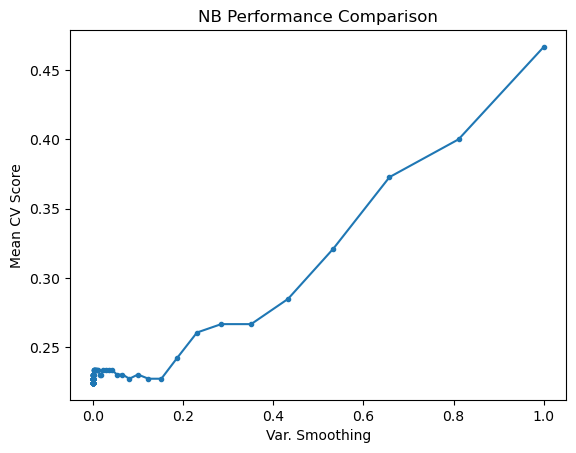

In [63]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [64]:
from sklearn.metrics import f1_score
print("the F1 score is")
f1_score(y_ts, gs_NB.predict(X_ts), average='micro')

the F1 score is


C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.12727272727272726

## Support vector model trial 1
I used Support vector with its defualt hyperparameter as the first try👌

In [65]:
#Building Svm model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', gamma=0.001, C=10)
svm.fit(X_tr,y_tr)

SVC(C=10, gamma=0.001)

In [66]:
#Predicting using Svm model
y_pred_svm = svm.predict(X_ts)
print(y_pred_svm)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 3. 4. 4. 4. 4. 4. 4. 4. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 2. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4.]


##  Support vector model trial2
I used Support vector with GridSearchCV to search for the best hyperparameters and gives a better accuracy.👌

In [67]:
param_grid_SVC = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
grid_classifier_SVC = GridSearchCV(SVC(probability=True), param_grid_SVC,scoring='accuracy', 
                       cv=5, refit=True, return_train_score=True)
grid_classifier_SVC.fit(X_tr, y_tr)

print(grid_classifier_SVC.best_params_)

C:\Users\DEBI\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [68]:
f1_score(y_ts, grid_classifier_SVC.predict(X_ts), average='micro')

0.7545454545454545

In [69]:
y_pred_svm2 = grid_classifier_SVC.predict(X_ts)
y_pred_svm2

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 3., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4.])

In [70]:
grid_classifier_SVC.score(X_tr, y_tr), grid_classifier_SVC.score(X_ts, y_ts)

(0.9989837398373984, 0.7545454545454545)

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [73]:
#A small comparosion between models
import warnings
warnings.filterwarnings('ignore')
gnb = GaussianNB()
svm = SVC()
dc = DecisionTreeClassifier()
models = [ gnb, svm, dc]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_tr, y=y_tr, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 0.3842018025484305
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.7042681031803586
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.6981663731482441
****


In [74]:
## I noticed that my data set has alot of categorical values 👀
test=pd.get_dummies(test)


In [75]:
#assign the test data set to Xts
Xts=test.loc[:]

In [76]:
Xts.shape


(479, 44)

In [77]:
#Predicting using decision tree model📊 
prediction1 = classifier_DTC.predict(Xts)
print(prediction1)

[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 3. 5. 4. 4. 4. 4. 5. 5. 4. 5. 3. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 3. 3. 4. 4. 3. 4. 4.
 5. 4. 4. 5. 5. 4. 4. 3. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4.
 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 3. 5. 6. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 3. 4. 3. 4. 4. 3. 4. 3. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 2. 5.
 4. 4. 3. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4. 4. 5. 4. 4. 5. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3. 4. 4. 3. 4.
 3. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 3. 3. 4. 4. 3.
 4. 4. 4. 4. 3. 4. 5. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3.
 4. 4. 3. 5. 4. 5. 4. 4. 3. 4. 3. 3. 4. 3. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 5. 4. 3. 4. 3. 3. 3. 3. 4. 4. 4. 4. 5.

In [78]:
#Predicting using decision tree model📊 
prediction2 = grid_search.predict(Xts)
print(prediction2)

[2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 2. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 2. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 2.

In [79]:
#Predicting using naive bayes model📊 
prediction3 = classifier_GNB.predict(Xts)
print(prediction3)

[3. 3. 3. 4. 4. 2. 3. 3. 4. 3. 5. 3. 3. 4. 4. 4. 3. 4. 3. 2. 5. 2. 3. 4.
 4. 3. 4. 4. 3. 4. 4. 4. 3. 4. 3. 4. 4. 4. 2. 2. 3. 3. 3. 4. 4. 3. 2. 2.
 2. 3. 5. 2. 4. 4. 3. 4. 4. 3. 3. 4. 4. 3. 4. 3. 2. 3. 4. 2. 3. 3. 2. 4.
 4. 3. 4. 4. 4. 4. 3. 3. 3. 2. 4. 4. 4. 2. 4. 5. 3. 3. 3. 3. 2. 5. 3. 3.
 3. 3. 2. 3. 4. 5. 4. 4. 3. 2. 2. 4. 3. 4. 3. 4. 3. 3. 4. 2. 4. 3. 2. 3.
 2. 3. 4. 4. 4. 5. 4. 4. 4. 4. 3. 4. 2. 3. 3. 3. 3. 4. 4. 3. 2. 4. 2. 4.
 3. 3. 3. 4. 4. 3. 4. 2. 4. 4. 2. 3. 3. 4. 5. 4. 2. 4. 3. 3. 2. 4. 4. 3.
 3. 4. 4. 4. 4. 3. 3. 3. 3. 4. 4. 4. 4. 3. 2. 3. 3. 4. 4. 2. 4. 3. 3. 2.
 3. 4. 4. 5. 3. 3. 3. 4. 3. 3. 3. 4. 4. 2. 3. 2. 2. 2. 3. 2. 3. 3. 3. 3.
 4. 3. 3. 3. 4. 2. 2. 4. 3. 3. 3. 4. 4. 2. 3. 3. 4. 2. 4. 4. 4. 4. 5. 4.
 4. 3. 3. 2. 3. 5. 3. 4. 3. 3. 2. 4. 3. 4. 2. 3. 3. 3. 3. 3. 4. 4. 3. 3.
 3. 4. 3. 3. 4. 3. 3. 3. 4. 3. 4. 3. 3. 4. 4. 3. 4. 3. 3. 4. 3. 3. 4. 3.
 4. 3. 3. 3. 4. 3. 3. 4. 4. 4. 3. 2. 3. 4. 3. 2. 4. 4. 4. 3. 3. 3. 3. 3.
 2. 3. 4. 3. 2. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 2.

In [80]:
#Predicting using support vector model📊 
prediction4 = grid_classifier_SVC.predict(Xts)
print(prediction4)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4.

In [81]:
pred_df = pd.DataFrame(data={'id': ids, 'rating': prediction2})

pred_df.to_csv('pred_walkthroughT.csv', index=False)

In [82]:
#Randomforest without a grid search
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(random_state=1)
clf1.fit(X_tr, y_tr)

y_pred = clf1.predict(X_ts)

accuracy_score(y_pred, y_ts)

0.8272727272727273

In [83]:
prediction5 = clf1.predict(Xts)
print(prediction5)

[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 3. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 5. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 3. 4. 4. 4. 5. 4. 5.

In [84]:
#convert it to csv to submit it to kaggle 
pred_df = pd.DataFrame(data={'id': ids, 'rating': prediction5})

pred_df.to_csv('pred_walkthroughT11.csv', index=False)

In [ ]:
#convert it to csv to submit it to kaggle 
pred_df = pd.DataFrame(data={'id': ids, 'rating': prediction4})

pred_df.to_csv('pred_walkthroughT11.csv', index=False)

In [ ]:
#convert it to csv to submit it to kaggle 
pred_df = pd.DataFrame(data={'id': ids, 'rating': prediction3})

pred_df.to_csv('pred_walkthroughT11.csv', index=False)

In [ ]:
#convert it to csv to submit it to kaggle 
pred_df = pd.DataFrame(data={'id': ids, 'rating': prediction2})

pred_df.to_csv('pred_walkthroughT11.csv', index=False)

In [ ]:
#convert it to csv to submit it to kaggle 
pred_df = pd.DataFrame(data={'id': ids, 'rating': prediction1})

pred_df.to_csv('pred_walkthroughT11.csv', index=False)

In [85]:
rfc=RandomForestClassifier(random_state=42)

In [86]:
#Randomforest with a grid search

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [87]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [88]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [89]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [90]:
rfc1.fit(X_tr, y_tr)


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [91]:
y_pred1 = rfc1.predict(X_ts)

accuracy_score(y_pred1, y_ts)

0.7818181818181819

In [92]:
prediction6 = clf1.predict(Xts)
print(prediction6)

[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 3. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 5. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 3. 4. 4. 4. 5. 4. 5.

In [93]:
pred_df1 = pd.DataFrame(data={'id': ids, 'rating': prediction6})

pred_df1.to_csv('pred_walkthroughT3.csv', index=False)

In [94]:
#Decision tree accuracy is 80% 
#naive bayes is 0.6
#SVM is 0.75
#the best accuracy was on random forest with an accuracy 0.82

## Why Data Mining is a misnomer? What is another preferred name?
•	The goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself.


•	The other preferred name for data mining is: Knowledge discovery (mining) in databases (KDD), knowledge extraction in computer science, the process of discovering interesting and useful patterns and relationships in large volumes of data. Data archeology, data dredging, information harvesting, business intelligence, etc.


## What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
•	The knowledge discovery process (KDP), also called knowledge discovery in databases, seeks new knowledge in some application domain IT involves( data selection, data cleaning and preprocessing, data transformation, data mining, pattern evaluation,deployment)

•	Data engineers are responsible for forming and keeping the infrastructure and data architecture that support an organization’s IT systems. they need to have skills in programming, data storage, dbms, while Data scientists and AI engineers are people who analyze large amounts of data using statistical methods, especially AI and ML. Modern companies nowadays need data scientists to help them determine which ads to show customers for example


## In data mining, what is the difference between prediction and categorization?
•	In the prediction technique, we need to predict the missing or unavailable value of the dataset. 

•	The classification technique is used to categorise the data, depending on its similarities and to identify the class.The accuracy relies on how well you guess the value for new data. 

•	Construct models (functions) based on some training examples

•	 Describe and distinguish classes or concepts for future prediction


## Why data science/machine learning is a bad idea in the context of information security?
• Attacks
        • Adversarial (front-end) - Confidentiality
        
        • Backdoor/data poisoning (data source) – Integrity
        
        • Training data reconstruction – Confidentiality (privacy)
        
        • Steeling the model - Confidentiality
        
        • Membership inference - Confidentiality (privacy)
        

• Increased risk of data breach and fine

• Increased uncertainty

• Difficult to evaluate change in AI

• Difficult to verify against compliance

• Responsibility, accountability, liability

• Should be part of the risk management framework



## What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

The CIA trio is a concept for guiding information security policy within an organisation. To prevent confusion with the Central Intelligence Agency, the paradigm is often known as the AIC triad (availability, integrity, and confidentiality).
•	Confidentiality:

•	Personal information (authentication)

•	Proprietary information (authorization)

•	Government classified information (encryption) \

•	Integrity:

•	Unauthorized transactions

•	Wrong execution of software

•	Availability:

•	Denial of Service

•	Loss of Data

